In [1]:
# Importar a biblioteca Pandas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Criar uma variável chamada df para armazenar o dataframe 
df = pd.read_csv(r"data\canadian_immegration_data.csv")

In [3]:
# Visualizar esse dataframe
df

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,161,140,122,133,128,211,160,174,217,2985
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,91,77,71,64,60,102,69,46,59,1677


In [4]:
# Obter algumas informações mais detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    195 non-null    object
 1   Continent  195 non-null    object
 2   Region     195 non-null    object
 3   DevName    195 non-null    object
 4   1980       195 non-null    int64 
 5   1981       195 non-null    int64 
 6   1982       195 non-null    int64 
 7   1983       195 non-null    int64 
 8   1984       195 non-null    int64 
 9   1985       195 non-null    int64 
 10  1986       195 non-null    int64 
 11  1987       195 non-null    int64 
 12  1988       195 non-null    int64 
 13  1989       195 non-null    int64 
 14  1990       195 non-null    int64 
 15  1991       195 non-null    int64 
 16  1992       195 non-null    int64 
 17  1993       195 non-null    int64 
 18  1994       195 non-null    int64 
 19  1995       195 non-null    int64 
 20  1996       195 non-null    int64

Podemos verificar que as três primeiras colunas são do tipo objeto, ou seja, são strings e nas colunas seguintes temos apenas valores inteiros. Não temos dados nulos em nenhuma das colunas, o que é ótimo, pois não precisamos fazer nenhum tratamento de dados nulos ou mudar o tipo de dado.

*Analisar as tendências de imigração do Brasil ao longo dos anos*

In [5]:
# Alterar o index do nosso dataframe para ser o país
df.set_index('Country', inplace=True)

In [6]:
# Criar a variável anos igual à lista com os intervalos de ano
anos = list(map(str, range(1980, 2014)))

In [7]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [8]:
brasil = df.loc['Brazil', anos]

In [9]:
brasil

1980     211
1981     220
1982     192
1983     139
1984     145
1985     130
1986     205
1987     244
1988     394
1989     650
1990     650
1991     877
1992    1066
1993     866
1994     566
1995     572
1996     586
1997     591
1998     531
1999     626
2000     845
2001     847
2002     745
2003     839
2004     917
2005     969
2006    1181
2007    1746
2008    2138
2009    2509
2010    2598
2011    1508
2012    1642
2013    1714
Name: Brazil, dtype: object

In [10]:
# Criar um dicionário onde daremos um nome para cada uma das colunas: ano e número de imigrantes
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [11]:
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


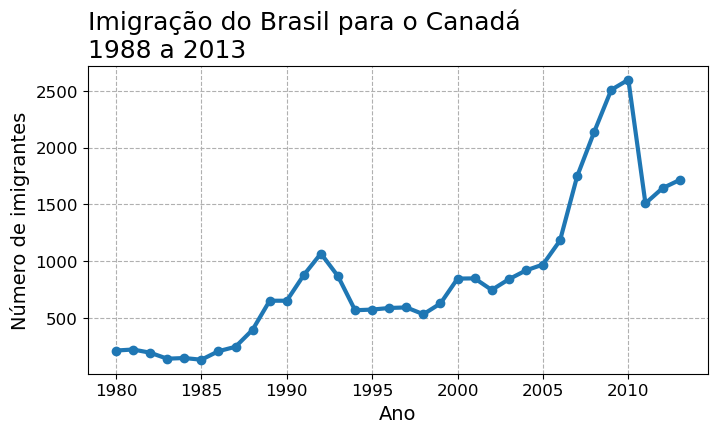

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker='o')

ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

plt.grid(linestyle='--')
plt.show()

*Criando subplots em uma direção*

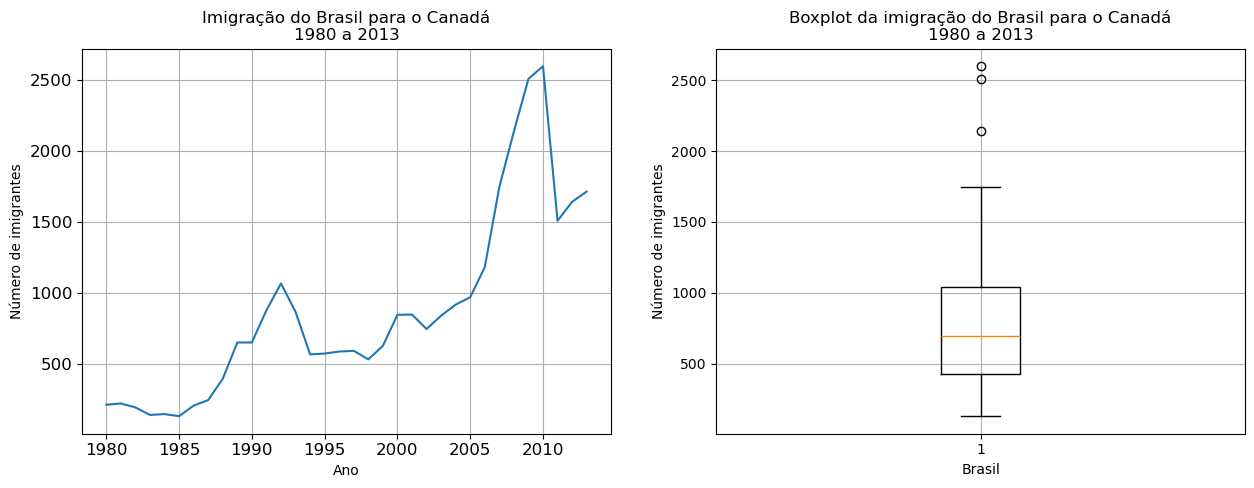

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()

plt.show()

O gráfico de linhas à esquerda, mostrando a tendência da imigração ao longo do tempo; e o boxplot à direita, apresentando informações estatísticas sobre os dados. Conseguimos comparar dois tipos de gráficos simultaneamente, ampliando a nossa análise e entendendo alguns aspectos estatísticos.

In [14]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


Com esse método, entendemos que o valor mínimo de imigrantes foi de 130 e o valor máximo foi de 2.598. No boxplot, há pontos que são considerados outliers (valores mais altos de imigração) no período entre 2006 e 2010.

Além disso, temos a informação de que em 25% do período, houve 428 imigrantes; em 50% do período, 697; e em 75% do período, 1.041 pessoas imigrantes.

*Comparando os números de imigrantes do Brasil e Argentina*

In [15]:
df_comparacao = df.loc[['Brazil', 'Argentina'], anos]

In [16]:
df_comparacao = df_comparacao.T

In [17]:
# Como resultado temos uma coluna com os anos e duas colunas para cada país contendo o número de imigrantes
df_comparacao.head()

Country,Brazil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


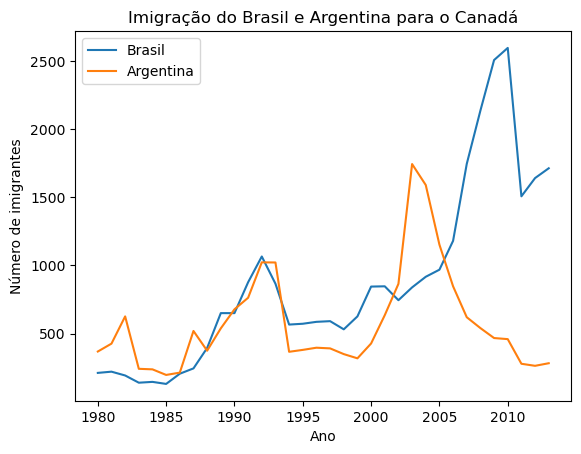

In [18]:
plt.plot(df_comparacao['Brazil'],label = 'Brasil')
plt.plot(df_comparacao['Argentina'],label ='Argentina')
plt.title('Imigração do Brasil e Argentina para o Canadá')
plt.xlabel('Ano')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.legend()
plt.show()

Com este gráfico, podemos notar que as tendências de imigração no Brasil e na Argentina eram bastante semelhantes no início do período. No entanto, a partir dos anos 2000, os números de imigrantes na Argentina começaram a aumentar e atingiram os valores mais elevados entre 2000 e 2005, antes de cair e atingir valores muito baixos nos anos mais recentes. Por outro lado, no caso do Brasil, os aumentos na imigração começaram após 2005 e parecem ter atingido o valor mais alto em 2010.

*Criando subplots em duas direções*

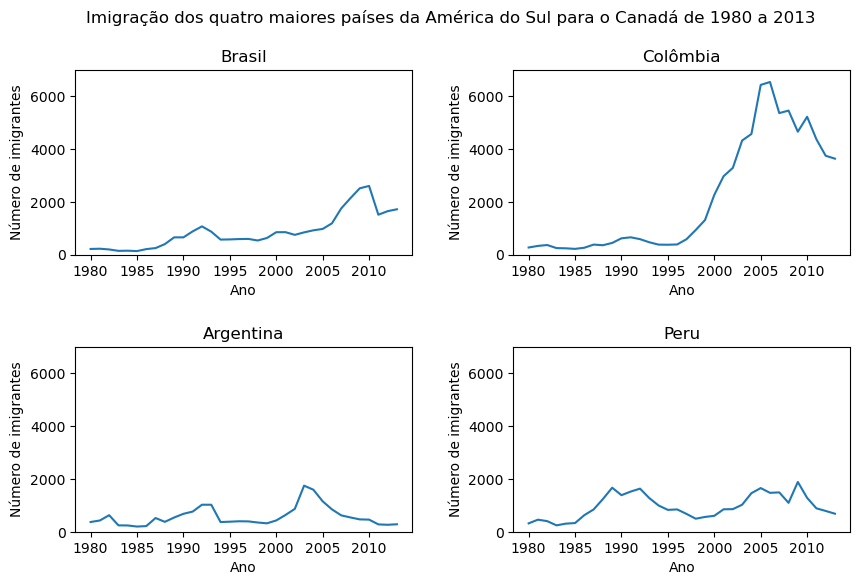

In [19]:
fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

axs[0,0].plot(df.loc['Brazil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colombia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

for ax in axs.flat:
  ax.set_xlabel('Ano')
  ax.set_ylabel('Número de imigrantes')

ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

plt.show()

*Análise dos imigrantes da América do Sul para o Canadá*

In [20]:
america_sul_sorted = df.query('Region == "South America"').sort_values('Total', ascending=True)

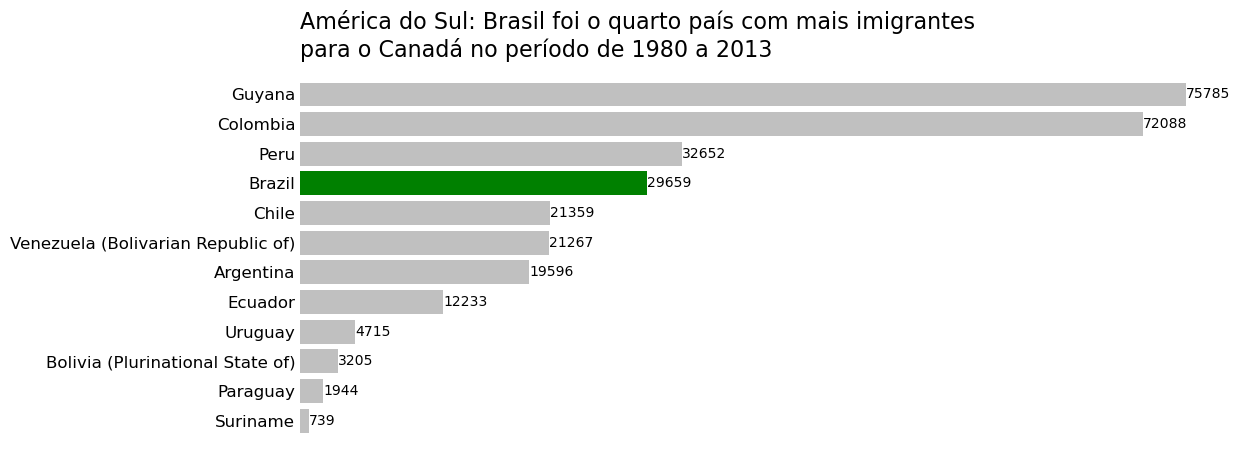

In [21]:
cores = []
for pais in america_sul_sorted.index:
    if pais == 'Brazil':
        cores.append('green')
    else:
        cores.append('silver')

fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

for i, v in enumerate(america_sul_sorted['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False) 
ax.tick_params(axis='both', which='both', length=0)

fig.savefig('imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

*Top 10 países com maior imigração para o Canadá*

In [22]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


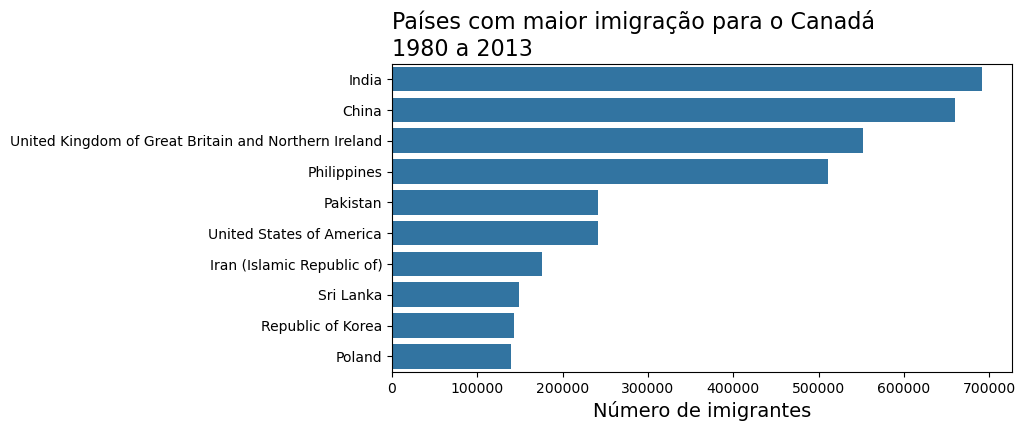

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))

ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('', fontsize=14)

plt.show()

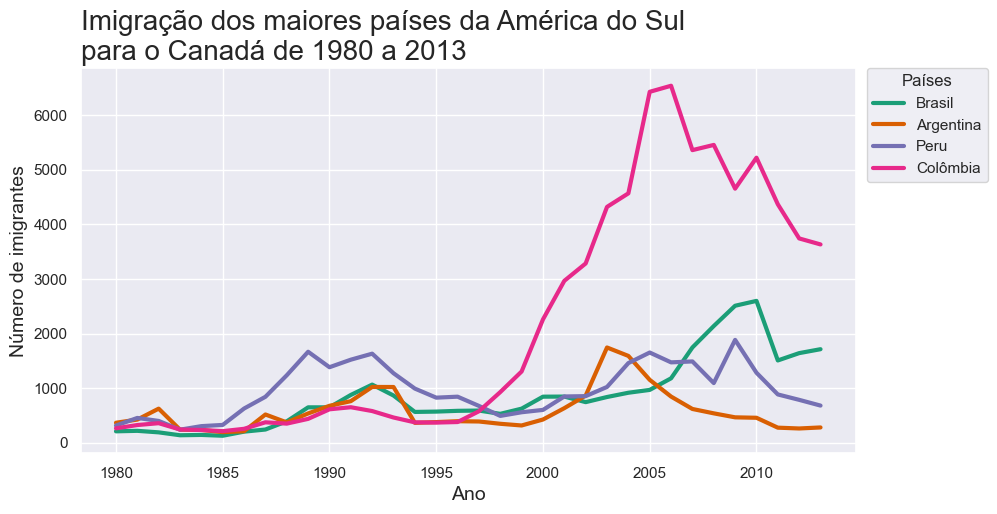

In [24]:
sns.set_theme()
sns.set_palette('Dark2')

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(df.loc['Brazil', anos], label='Brasil', lw=3)
ax = sns.lineplot(df.loc['Argentina', anos], label='Argentina', lw=3)
ax = sns.lineplot(df.loc['Peru', anos], label='Peru', lw=3)
ax = sns.lineplot(df.loc['Colombia', anos], label='Colômbia', lw=3)

ax.set_title('Imigração dos maiores países da América do Sul\npara o Canadá de 1980 a 2013', loc='left', fontsize=20)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)

ax.xaxis.set_major_locator(plt.MultipleLocator(5))

ax.legend(title='Países', loc='upper right', bbox_to_anchor=(1.18, 1.02))

plt.show()

*Função para gerar gráfico*

In [25]:
def gerar_grafico_paleta(palette):
    fig, ax = plt.subplots(figsize=(8,4))
    ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
    ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
    ax.set_xlabel('Número de imigrantes', fontsize=14)
    ax.set_ylabel('')
    plt.show()

C:\Users\EDUCAÇÃO PC\AppData\Local\Temp\ipykernel_5672\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


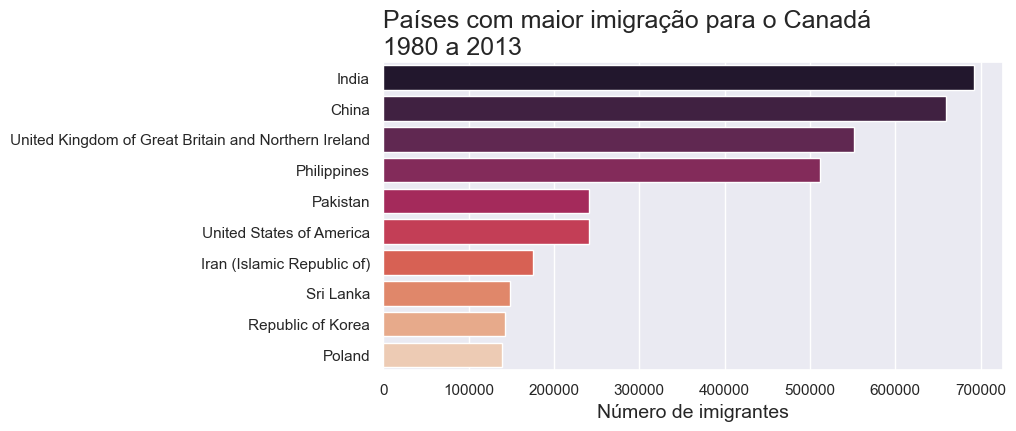

In [26]:
gerar_grafico_paleta('rocket')

C:\Users\EDUCAÇÃO PC\AppData\Local\Temp\ipykernel_5672\1910664014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)


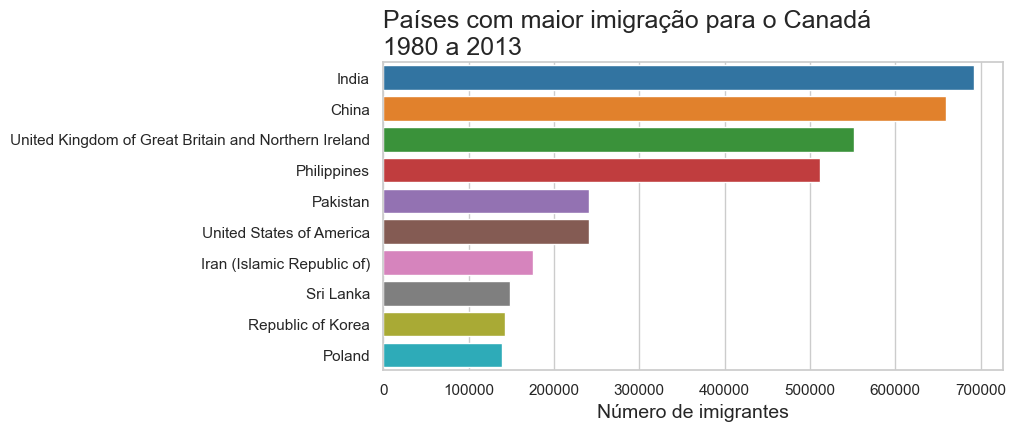

In [27]:
sns.set_theme(style='whitegrid')
gerar_grafico_paleta("tab10")

*Gráfico interativo*

In [33]:
df_america_sul_clean = america_sul_sorted.drop(['Continent', 'Region', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T

In [34]:
america_sul_final.head()

Country,Suriname,Paraguay,Bolivia (Plurinational State of),Uruguay,Ecuador,Argentina,Venezuela (Bolivarian Republic of),Chile,Brazil,Peru,Colombia,Guyana
DevName,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions,Developing regions
1980,15,45,44,128,238,368,103,1233,211,317,266,2334
1981,10,26,52,132,207,426,117,1069,220,456,326,2943
1982,21,32,42,146,184,626,174,1078,192,401,360,3575
1983,12,40,49,105,155,241,124,781,139,241,244,2650


In [ ]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='Country', markers=True,
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')

fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

In [39]:
fig.write_html('imigracao_america_sul.html')